<a href="https://colab.research.google.com/github/radhakrishnan-omotec/ocr_repo/blob/main/IRIS_week11b_Medical_Project_Tesseract_OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Mathematical Model Implementation

Python code implementation of the mathematical model for calculating the final ingredient levels in a ENERGY DRINK based on the provided ingredient levels and volumes:

1. We define a `calculate_final_ingredient_levels` function that takes two lists as input: `ingredients` (initial ingredient levels in grams or milligrams) and `volumes` (volumes of each ingredient in milliliters).

2. The function calculates the total volume and then calculates the final levels of each ingredient using the provided mathematical model.

3. We specify the initial ingredient levels and volumes for REDBULL ENERGY DRINK in dictionaries.

4. We call the `calculate_final_ingredient_levels` function with the ingredient and volume data, and it returns the final ingredient levels.

5. Finally, we display the final ingredient levels for each ingredient in grams or milligrams.


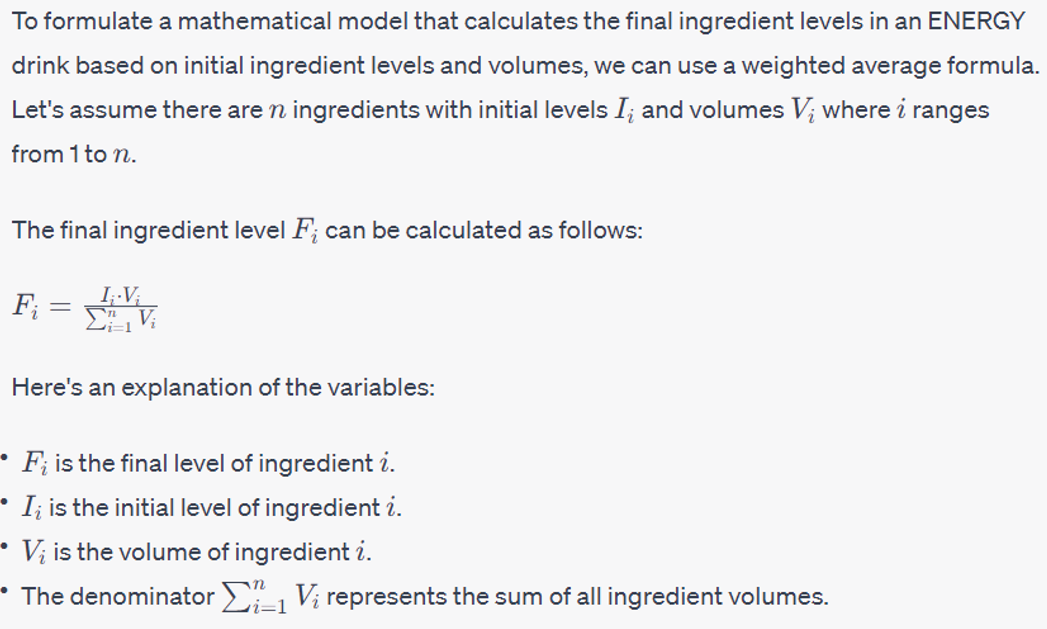

In [ ]:
!git clone https://github.com/radhakrishnan-omotec/ocr_repo.git

Cloning into 'ocr_repo'...
remote: Enumerating objects: 146, done.
remote: Counting objects: 100% (61/61), done.
remote: Compressing objects: 100% (61/61), done.
remote: Total 146 (delta 33), reused 0 (delta 0), pack-reused 85
Receiving objects: 100% (146/146), 24.91 MiB | 18.65 MiB/s, done.
Resolving deltas: 100% (77/77), done.


<hr><hr>

In [ ]:
################ MATHEMATICAL MODEL FUNCTION ####################


In [ ]:
import pandas as pd
import re


    Calculate the final ingredient levels based on initial levels and volumes.

    Args:
        ingredients (list): List of initial ingredient levels (in grams or milligrams).
        volumes (list): List of volumes of each ingredient (in milliliters).

    Returns:
        list: List of final ingredient levels.

    Raises:
        ValueError: If the number of ingredients doesn't match the number of volumes.

In [ ]:
def calculate_final_ingredient_levels(ingredients, volumes):



    if len(ingredients) != len(volumes):
        raise ValueError("The number of ingredients must match the number of volumes.")

    total_volume = sum(volumes)
    final_levels = []

    for i in range(len(ingredients)):
        final_level = (ingredients[i] * volumes[i]) / total_volume
        final_levels.append(final_level)

    return final_levels

In [ ]:
################ MAIN FUNCTION ####################

In [ ]:
def load_ingredient_data(csv_file):
    """
    Load ingredient data from a CSV file and split it into an output dictionary.

    Args:
        csv_file (str): Path to the CSV file.

    Returns:
        dict: Initial ingredient levels dictionary.
    """
    df = pd.read_csv(csv_file)
    ingredient_data = df["Levels of Each Ingredient"].str.split(", ")
    ingredients = {}

    for row in ingredient_data:
        for item in row:
            name, value = item.split(": ")
            name = name.strip()
            value = value.strip()

            # Use regular expressions to extract numbers
            numeric_content = re.search(r'\d+', value).group()

            # Convert the extracted numeric content to an integer or float as needed
            numeric_value = int(numeric_content)  # If you want it as an integer

            print("numeric_value", numeric_value)

            if name in ingredients:
                ingredients[name] += numeric_value
            else:
                ingredients[name] = numeric_value

            print("INGREDIENTS LIST :" , ingredients)

    return ingredients

def main():
    # Load initial ingredient data from the CSV file
    input_csv = "/content/ocr_repo/Energy Drinks Input.csv"
    ingredients = load_ingredient_data(input_csv)

    # Calculate final ingredient levels
    volumes = {
        "Sugar": 100,     # Volume of sugar in milliliters
        "Caffeine": 100,  # Volume of caffeine in milliliters
        "Taurine": 50     # Volume of taurine in milliliters
    }

    final_levels = calculate_final_ingredient_levels(list(ingredients.values()), list(volumes.values()))

    # Display the final ingredient levels
    for i, ingredient in enumerate(ingredients.keys()):
        print("********************************")
        print(f"Final {ingredient} level: {final_levels[i]:.2f} mg")
        print("********************************")

if __name__ == "__main__":
    main()


numeric_value 27
INGREDIENTS LIST : {'Sugar': 27}
numeric_value 80
INGREDIENTS LIST : {'Sugar': 27, 'Caffeine': 80}
numeric_value 1000
INGREDIENTS LIST : {'Sugar': 27, 'Caffeine': 80, 'Taurine': 1000}
********************************
Final Sugar level: 10.80 mg
********************************
********************************
Final Caffeine level: 32.00 mg
********************************
********************************
Final Taurine level: 200.00 mg
********************************


<hr> <hr>